# Daub 5/3 integer-to-integer system

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Импорт пользовательских функций.

In [2]:
from Functions.user_functions import indx_even
from Functions.daub_5_3 import daub_5_3
from Functions.daub_5_3_lift import daub_5_3_lift
from Functions.idaub_5_3_lift import idaub_5_3_lift
from Functions.daub_5_3_lift_2D import daub_5_3_lift_2D
from Functions.idaub_5_3_lift_2D import idaub_5_3_lift_2D

In [3]:
f = np.random.randint(low=-10, high=11, size=8)
N = len(f)
d = [0] * (N//2)
a = [0] * (N//2)

### Исследование коэффициентов ${d}$

In [4]:
# Функция вычисления коэффициентов флуктуации.
def d_func(k, f, N, int_flag):
    if int_flag:
        return f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)]) //2
    else:
        return f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)]) /2

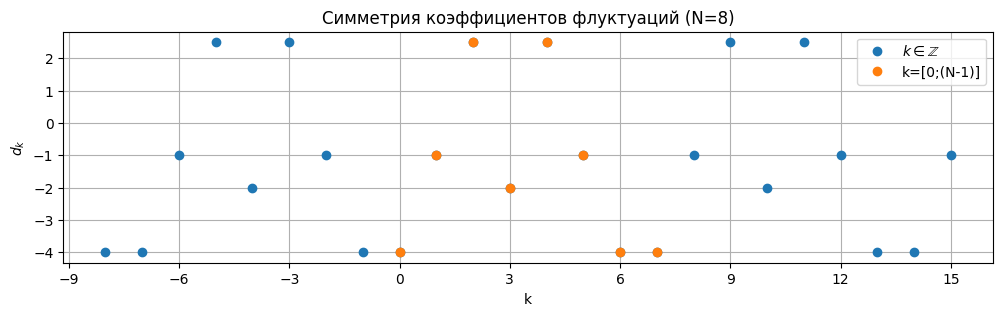

In [5]:
n_gr = []
d_gr = []
for k in range(-N,2*N):
    n_gr.append(k)
    d_gr.append(d_func(k, f, N, int_flag=False))
n_gr_N = []
d_gr_N = []

for k in range(N):
    n_gr_N.append(k)
    d_gr_N.append(d_func(k, f, N, int_flag=False))
    
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(12)
ax.plot(n_gr, d_gr, 'o')
ax.plot(n_gr_N, d_gr_N, 'o')

# Force integer ticks on x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend(['$k \in \mathbb{Z}$','k=[0;(N-1)]'])
plt.title('Симметрия коэффициентов флуктуаций' + ' (N=' + str(N) + ')')
plt.xlabel('k')
plt.ylabel('$d_k$')
plt.grid(True)
plt.savefig('readme_img/d_symmetry.png', bbox_inches='tight')
plt.show()

Отсюда вывод: ${d_{-1} = d_0}$.

## Прямое преобразование

In [6]:
for k in range(N//2):
    d[k] = f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)])/2
    if k == 0:
        a[k] = f[indx_even(2*k,N)] + d[k] /2
    else:
        a[k] = f[indx_even(2*k,N)] + (d[k-1] + d[k]) /4
    #a[k] = -1/8*(f[indx_even(2*k-2,N)] + f[indx_even(2*k+2,N)]) + 1/4*(f[indx_even(2*k-1,N)] + f[indx_even(2*k+1,N)]) + 3/4*f[indx_even(2*k,N)]
print('a', a)
print('d', d)

a [-3.0, 5.75, -8.625, -5.875]
d [-4.0, -1.0, 2.5, -2.0]


## Обратное преобразование

In [7]:
f_rec = [0] * N
# Odd values.
for k in range(N//2):
    if k == 0:
        f_rec[2*k] = a[k] - d[k] /2
    else:
        f_rec[2*k] = a[k] - (d[k-1] + d[k]) /4

# Even values.
for k in range(N//2):
    f_rec[2*k+1] = d[k] + (f[2*k] + f[indx_even(2*k+2,N)])/2
print('Reconstruction:', f_rec)
print('Original:', f)
print('Difference:', f-f_rec)

Reconstruction: [-1.0, -1.0, 7.0, -2.0, -9.0, -5.0, -6.0, -8.0]
Original: [-1 -1  7 -2 -9 -5 -6 -8]
Difference: [0. 0. 0. 0. 0. 0. 0. 0.]


## Прямое и обратное преобразование при помощи матричных операций

In [8]:
Mdir = np.matrix(np.concatenate(daub_5_3(N), axis = 0))
tr = np.matrix(f)*(Mdir.T)
Mrev = np.linalg.inv(Mdir).T
print('Wavelet coefficients:', tr.tolist()[0])
print('Reconstruction:', (tr * Mrev).tolist()[0])
print('Original:', f)
print('Difference:', f-(tr * Mrev).tolist()[0])

Wavelet coefficients: [-3.0, 5.75, -8.625, -5.875, -4.0, -1.0, 2.5, -2.0]
Reconstruction: [-1.0, -1.0, 7.0, -2.0, -9.0, -5.0, -6.0, -8.0]
Original: [-1 -1  7 -2 -9 -5 -6 -8]
Difference: [0. 0. 0. 0. 0. 0. 0. 0.]


## Целочисленные преобразования

Созданы функции lifting-преобразования.

In [9]:
# float-преобразование.
coeff_float = daub_5_3_lift(f, int_flag=False)
print(coeff_float)

# int-преобразование.
coeff_int = daub_5_3_lift(f, int_flag=True)
print(coeff_int)

[-3.     5.75  -8.625 -5.875 -4.    -1.     2.5   -2.   ]
[-3  6 -9 -6 -4 -1  2 -2]


Обратное преобразование, также по lifting-схеме.

In [19]:
# float-преобразование.
f_float = idaub_5_3_lift(coeff_float, int_flag=False)
print(np.array(f_float).dtype)
print(f_float)

# int-преобразование.
f_int = idaub_5_3_lift(coeff_int, int_flag=True)
print(np.array(f_int).dtype)
print(f_int)

print('Difference:', [a - b for a, b in zip(f_float, f_int)])

float64
[-1.0, -1.0, 7.0, -2.0, -9.0, -5.0, -6.0, -8.0]
int32
[-1, -1, 7, -2, -9, -5, -6, -8]
Difference: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## 2D-преобразование

Формируем двумерный массив.

In [11]:
g = np.random.randint(low=-10, high=11, size=10*8).reshape(10,8)
print(g)

[[ -7   4   6  -4  -2   4  -2  -9]
 [  1  -7 -10   4   2   0  -9  -4]
 [  0  10  -2  10   0  -8   3  -5]
 [ -8   7   3  -7  -2   8   2  -5]
 [ 10  -2   1  -3  -3   1  -5   5]
 [  2   2  10   7   2  -1  -1  -1]
 [  4   4  -2  -9 -10  -6  -5  -6]
 [ -3  -2  -7  -9  -6  -7  -7   5]
 [  3   9  -5   5  -4  -5   7   7]
 [  9   0   4   8  -9  -4   8  -2]]


### Прямое преобразование

In [21]:
# float-преобразование.
coeff_2D_float = daub_5_3_lift_2D(g, int_flag=False)
print(coeff_2D_float.dtype)
print(coeff_2D_float)

float64
[[ -4.5       14.25      -6.875      4.625      7.       -14.
    2.5      -12.      ]
 [  7.25       6.0625    -1.125      0.9375     7.5       10.75
  -15.25      -7.      ]
 [  7.875     -7.75      -2.25      -1.6875   -10.25       1.25
    1.75      13.5     ]
 [  6.25      -3.1875    -7.9375    -2.125      3.5       -2.25
    2.5       -7.      ]
 [  5.875      0.8125     3.75       5.125     11.75       5.5
   -4.5       -1.      ]
 [  0.4375    -3.546875   2.875     -5.484375   1.125      7.1875
    0.3125     0.25    ]
 [  0.53125    3.078125  -2.71875    2.0625     8.8125    -4.5
    4.625     -5.375   ]
 [  3.53125    6.515625  -0.671875  -2.328125  -5.6875     0.75
   -0.4375     1.625   ]
 [  1.53125   -7.46875   -7.796875  -3.375      6.8125    -1.6875
   -1.        10.      ]
 [  8.6875     5.40625   -5.375      7.1875    -0.625     13.25
   -5.75     -10.5     ]]


In [23]:
# int-преобразование.
coeff_2D_int = daub_5_3_lift_2D(g, int_flag=True)
print(coeff_2D_int.dtype)
print(coeff_2D_int)

int32
[[ -5  15  -7   5   7 -14   3 -12]
 [  7   7  -2   1   8  11 -16  -7]
 [  7  -7  -2  -2 -11   1   2  13]
 [  6  -3  -8  -3   3  -2   2  -7]
 [  5   1   4   4  12   5  -5  -1]
 [  1  -3   3  -5   1   7   0   0]
 [  1   3  -3   2   8  -5   5  -5]
 [  3   7   0  -2  -6   1  -1   2]
 [  2  -7  -8  -4   7  -2  -2  10]
 [  9   6  -5   7  -1  13  -6 -10]]


### Обратное преобразование

In [25]:
g_float = idaub_5_3_lift_2D(coeff_2D_float, int_flag=False)
print(g_float)
print('Difference (sum):', np.sum(g-g_float))

[[ -7.   4.   6.  -4.  -2.   4.  -2.  -9.]
 [  1.  -7. -10.   4.   2.   0.  -9.  -4.]
 [  0.  10.  -2.  10.   0.  -8.   3.  -5.]
 [ -8.   7.   3.  -7.  -2.   8.   2.  -5.]
 [ 10.  -2.   1.  -3.  -3.   1.  -5.   5.]
 [  2.   2.  10.   7.   2.  -1.  -1.  -1.]
 [  4.   4.  -2.  -9. -10.  -6.  -5.  -6.]
 [ -3.  -2.  -7.  -9.  -6.  -7.  -7.   5.]
 [  3.   9.  -5.   5.  -4.  -5.   7.   7.]
 [  9.   0.   4.   8.  -9.  -4.   8.  -2.]]
Difference (sum): 0.0


In [27]:
g_int = idaub_5_3_lift_2D(coeff_2D_int, int_flag=True)
print(g_int)
print('Difference (sum):', np.sum(g-g_int))

[[ -7   4   6  -4  -2   4  -2  -9]
 [  1  -7 -10   4   2   0  -9  -4]
 [  0  10  -2  10   0  -8   3  -5]
 [ -8   7   3  -7  -2   8   2  -5]
 [ 10  -2   1  -3  -3   1  -5   5]
 [  2   2  10   7   2  -1  -1  -1]
 [  4   4  -2  -9 -10  -6  -5  -6]
 [ -3  -2  -7  -9  -6  -7  -7   5]
 [  3   9  -5   5  -4  -5   7   7]
 [  9   0   4   8  -9  -4   8  -2]]
Difference (sum): 0


In [30]:
print(np.sum(g.astype(float)**2))
print(np.sum(coeff_2D_float.astype(float)**2))

2618.0
3263.767333984375
